In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv("/content/customer_churn_business_dataset.csv")
df.head(10)
#load dataset

,customer_id,gender,age,country,city,customer_segment,tenure_months,signup_channel,contract_type,monthly_logins,...,avg_resolution_time,complaint_type,csat_score,escalations,email_open_rate,marketing_click_rate,nps_score,survey_response,referral_count,churn
0,CUST_00001,Male,68,Bangladesh,London,SME,22,Web,Monthly,26,...,13.354360,Service,4.0,0,0.71,0.40,27,Satisfied,1,0
1,CUST_00002,Female,57,Canada,Sydney,Individual,9,Mobile,Monthly,7,...,25.140088,Billing,2.0,0,0.78,0.33,-19,Neutral,2,1
2,CUST_00003,Male,24,Germany,New York,SME,58,Web,Yearly,19,...,27.572928,Service,3.0,0,0.35,0.49,80,Neutral,1,0
3,CUST_00004,Male,49,Australia,Dhaka,Individual,19,Mobile,Yearly,34,...,26.420822,Technical,5.0,1,0.83,0.15,100,Neutral,0,0
4,CUST_00005,Male,65,Bangladesh,Delhi,Individual,52,Web,Monthly,20,...,26.674579,Technical,4.0,0,0.65,0.44,21,Unsatisfied,1,0
5,CUST_00006,Female,36,India,London,Individual,54,Mobile,Monthly,1,...,36.038391,Technical,4.0,1,0.83,0.05,-40,Neutral,1,0
6,CUST_00007,Male,23,India,Toronto,SME,54,Mobile,Monthly,21,...,36.892928,Billing,4.0,0,0.75,0.46,-3,Neutral,1,0
7,CUST_00008,Male,37,Bangladesh,Sydney,Individual,7,Referral,Yearly,17,...,25.024133,Technical,4.0,1,0.54,0.13,28,Satisfied,1,0
8,CUST_00009,Male,44,India,Delhi,SME,15,Referral,Monthly,29,...,32.465536,Technical,2.0,0,0.85,0.13,-24,Satisfied,0,0
9,CUST_00010,Female,70,Bangladesh,Berlin,Individual,17,Mobile,Monthly,18,...,42.986192,Billing,4.0,0,0.72,0.13,17,Neutral,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             10000 non-null  object 
 1   gender                  10000 non-null  object 
 2   age                     10000 non-null  int64  
 3   country                 10000 non-null  object 
 4   city                    10000 non-null  object 
 5   customer_segment        10000 non-null  object 
 6   tenure_months           10000 non-null  int64  
 7   signup_channel          10000 non-null  object 
 8   contract_type           10000 non-null  object 
 9   monthly_logins          10000 non-null  int64  
 10  weekly_active_days      10000 non-null  int64  
 11  avg_session_time        10000 non-null  float64
 12  features_used           10000 non-null  int64  
 13  usage_growth_rate       10000 non-null  float64
 14  last_login_days_ago     10000 non-null 

In [ ]:
df.isnull().sum()
#menghitung missing value pada dataset

,0
customer_id,0
gender,0
age,0
country,0
city,0
customer_segment,0
tenure_months,0
signup_channel,0
contract_type,0
monthly_logins,0


In [ ]:
import pandas as pd

print("--- Status Nilai Null complaint_type SEBELUM Koreksi ---")
print(f"Jumlah nilai null awal: {df['complaint_type'].isnull().sum()}")

df['complaint_type'].fillna('No_Complaint', inplace=True)

print(f"\n✅ Semua nilai null di kolom 'complaint_type' telah diisi dengan Kategori Baru: 'No_Complaint'.")

print("\n--- Verifikasi Setelah Imputasi ---")
print(f"Jumlah nilai null di 'complaint_type' sekarang: {df['complaint_type'].isnull().sum()}")

--- Status Nilai Null complaint_type SEBELUM Koreksi ---
Jumlah nilai null awal: 0

✅ Semua nilai null di kolom 'complaint_type' telah diisi dengan Kategori Baru: 'No_Complaint'.

--- Verifikasi Setelah Imputasi ---
Jumlah nilai null di 'complaint_type' sekarang: 0


/tmp/ipython-input-619178630.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['complaint_type'].fillna('No_Complaint', inplace=True)


In [ ]:
print(f"Jumlah baris duplikat: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)

Jumlah baris duplikat: 0


In [ ]:
churn_rate = df['churn'].value_counts(normalize=True) * 100
print(churn_rate)
# Visualisasi: Bar chart atau Pie chart

churn
0    89.79
1    10.21
Name: proportion, dtype: float64



[8.3.A] Analisis Distribusi Churn:
Persentase Churn:
churn
0    89.79
1    10.21
Name: proportion, dtype: float64


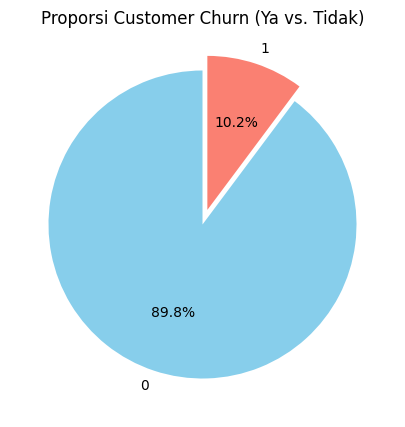

In [ ]:
# Cell 3: EDA - Analisis Target Variabel (Churn)

print("\n[8.3.A] Analisis Distribusi Churn:")

churn_percentage = df['churn'].value_counts(normalize=True) * 100
print(f"Persentase Churn:\n{churn_percentage.round(2)}")

# Visualisasi Distribusi Churn
plt.figure(figsize=(6, 5))
plt.pie(
    churn_percentage,
    labels=churn_percentage.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'salmon'],
    explode=(0, 0.1)
)
plt.title('Proporsi Customer Churn (Ya vs. Tidak)')
plt.show()

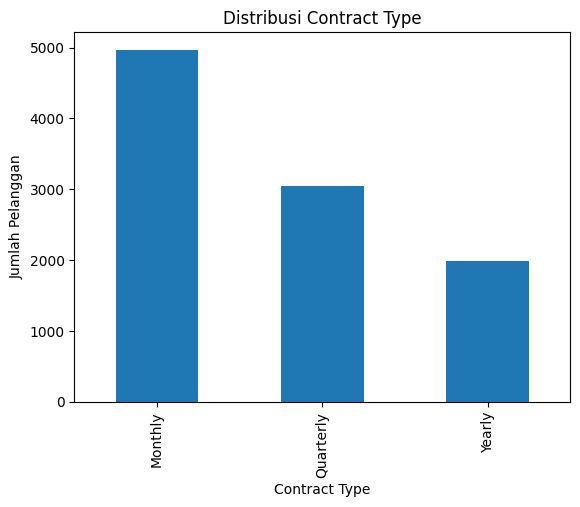

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("customer_churn_business_dataset.csv")

# Distribusi contract type
contract_counts = df['contract_type'].value_counts()

plt.figure()
contract_counts.plot(kind='bar')
plt.title("Distribusi Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Jumlah Pelanggan")
plt.show()


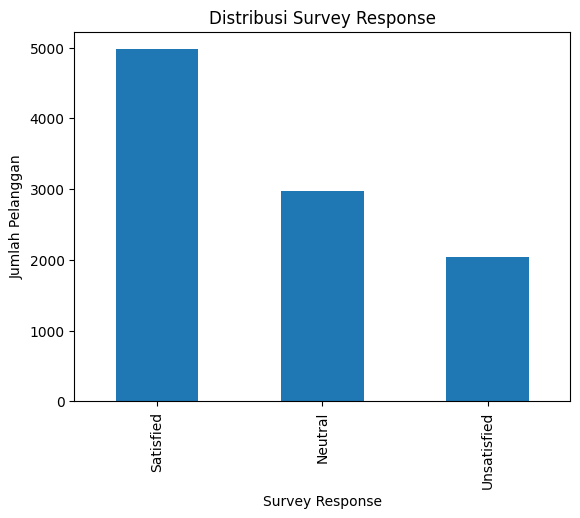

In [22]:

# Distribusi survey response
survey_counts = df['survey_response'].value_counts()

plt.figure()
survey_counts.plot(kind='bar')
plt.title("Distribusi Survey Response")
plt.xlabel("Survey Response")
plt.ylabel("Jumlah Pelanggan")
plt.show()


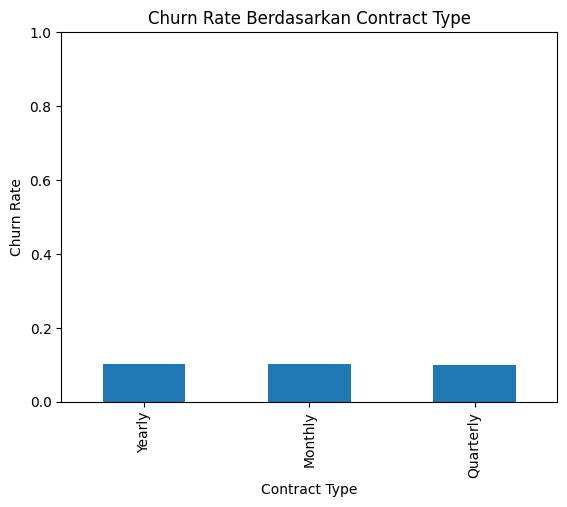

,churn
contract_type,
Yearly,0.103379
Monthly,0.103282
Quarterly,0.099344


In [25]:
contract_churn_rate = (
    df.groupby('contract_type')['churn']
    .mean()
    .sort_values(ascending=False)
)

plt.figure()
contract_churn_rate.plot(kind='bar')
plt.title("Churn Rate Berdasarkan Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Churn Rate")
plt.ylim(0,1)
plt.show()

contract_churn_rate


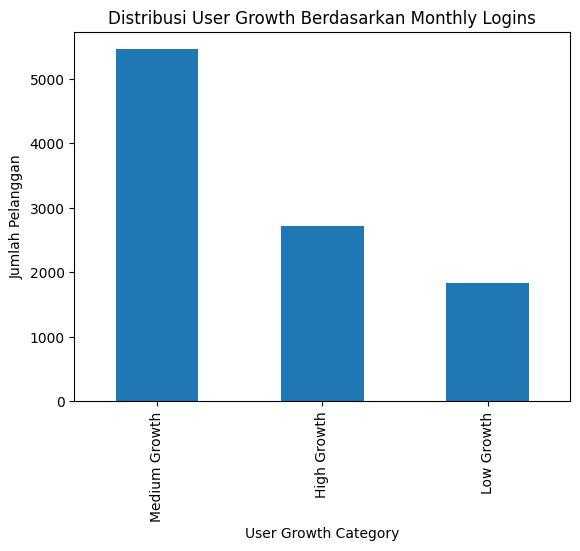

In [27]:
# Membuat kategori user growth dari monthly_logins
def login_growth_category(login):
    if login <= 10:
        return "Low Growth"
    elif login <= 25:
        return "Medium Growth"
    else:
        return "High Growth"

df['user_growth_category'] = df['monthly_logins'].apply(login_growth_category)

df[['monthly_logins', 'user_growth_category']].head()

growth_counts = df['user_growth_category'].value_counts()

plt.figure()
growth_counts.plot(kind='bar')
plt.title("Distribusi User Growth Berdasarkan Monthly Logins")
plt.xlabel("User Growth Category")
plt.ylabel("Jumlah Pelanggan")
plt.show()


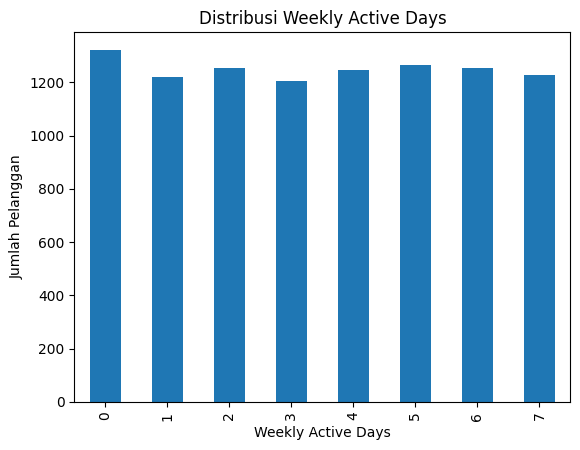

In [32]:
plt.figure()
df['weekly_active_days'].value_counts().sort_index().plot(kind='bar')
plt.title("Distribusi Weekly Active Days")
plt.xlabel("Weekly Active Days")
plt.ylabel("Jumlah Pelanggan")
plt.show()


In [36]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("customer_churn_business_dataset.csv")

cols = [
    'signup_channel',
    'last_login_days_ago',
    'survey_response',
    'churn'
]

df[cols].head()


,signup_channel,last_login_days_ago,survey_response,churn
0,Web,7,Satisfied,0
1,Mobile,2,Neutral,1
2,Web,23,Neutral,0
3,Mobile,24,Neutral,0
4,Web,2,Unsatisfied,0


In [41]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("customer_churn_business_dataset.csv")

df['potential_churn'] = (
    (df['monthly_logins'] <= 20) &
    (df['weekly_active_days'] <= 3) &
    (df['survey_response'].isin(['Unsatisfied', 'Neutral']))
).astype(int)

df[['monthly_logins','weekly_active_days','survey_response','potential_churn']].head()


,monthly_logins,weekly_active_days,survey_response,potential_churn
0,26,7,Satisfied,0
1,7,5,Neutral,0
2,19,5,Neutral,0
3,34,7,Neutral,0
4,20,6,Unsatisfied,0


In [43]:
df['weekly_active_days_derived'] = (
    df['monthly_logins'] / 4
).clip(upper=7).round().astype(int)

df[['monthly_logins','weekly_active_days_derived']].head()


,monthly_logins,weekly_active_days_derived
0,26,6
1,7,2
2,19,5
3,34,7
4,20,5


In [46]:
import pandas as pd

df = pd.read_csv("customer_churn_business_dataset.csv")

df['risk_score'] = 0

df.loc[df['monthly_logins'] <= 10, 'risk_score'] += 1
df.loc[df['weekly_active_days'] <= 2, 'risk_score'] += 1
df.loc[df['last_login_days_ago'] >= 14, 'risk_score'] += 1
df.loc[df['survey_response'].isin(['Unsatisfied', 'Neutral']), 'risk_score'] += 1
df.loc[df['contract_type'] == 'Monthly', 'risk_score'] += 1

df[['monthly_logins','weekly_active_days','last_login_days_ago',
    'survey_response','contract_type','risk_score']].head()


,monthly_logins,weekly_active_days,last_login_days_ago,survey_response,contract_type,risk_score
0,26,7,7,Satisfied,Monthly,1
1,7,5,2,Neutral,Monthly,3
2,19,5,23,Neutral,Yearly,2
3,34,7,24,Neutral,Yearly,2
4,20,6,2,Unsatisfied,Monthly,2


In [47]:
df['potential_churn'] = (df['risk_score'] >= 3).astype(int)

df[['customer_id','risk_score','potential_churn']].head()


,customer_id,risk_score,potential_churn
0,CUST_00001,1,0
1,CUST_00002,3,1
2,CUST_00003,2,0
3,CUST_00004,2,0
4,CUST_00005,2,0


<Figure size 640x480 with 0 Axes>

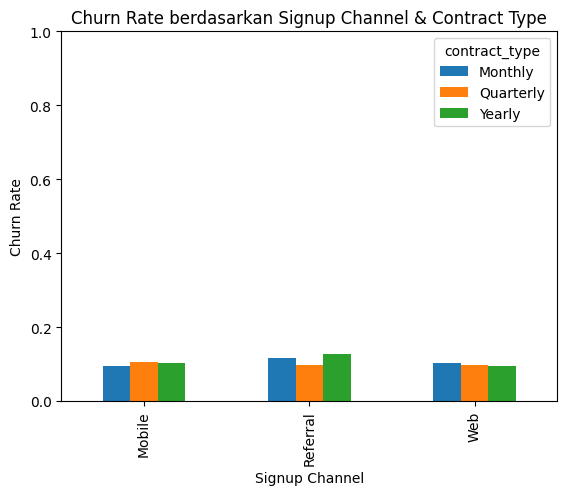

In [50]:
channel_contract_churn = (
    df.groupby(['signup_channel', 'contract_type'])['churn']
    .mean()
    .reset_index(name='churn_rate')
    .sort_values(by='churn_rate', ascending=False)
)

channel_contract_churn
pivot_churn = channel_contract_churn.pivot(
    index='signup_channel',
    columns='contract_type',
    values='churn_rate'
)

plt.figure()
pivot_churn.plot(kind='bar')
plt.title("Churn Rate berdasarkan Signup Channel & Contract Type")
plt.xlabel("Signup Channel")
plt.ylabel("Churn Rate")
plt.ylim(0,1)
plt.show()


In [51]:
df['potential_churn'] = (
    (df['signup_channel'] == 'Mobile') &
    (df['contract_type'] == 'Monthly')
).astype(int)

df[['customer_id','signup_channel','contract_type','potential_churn']].head()


,customer_id,signup_channel,contract_type,potential_churn
0,CUST_00001,Web,Monthly,0
1,CUST_00002,Mobile,Monthly,1
2,CUST_00003,Web,Yearly,0
3,CUST_00004,Mobile,Yearly,0
4,CUST_00005,Web,Monthly,0


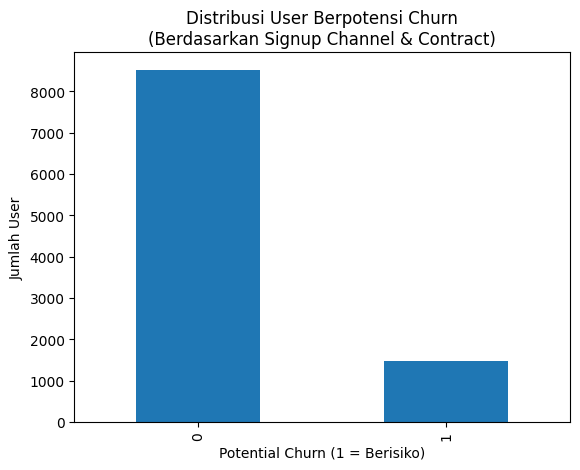

In [52]:
plt.figure()
df['potential_churn'].value_counts().plot(kind='bar')
plt.title("Distribusi User Berpotensi Churn\n(Berdasarkan Signup Channel & Contract)")
plt.xlabel("Potential Churn (1 = Berisiko)")
plt.ylabel("Jumlah User")
plt.show()


In [53]:
potential_churn_users = df[df['potential_churn'] == 1][
    ['customer_id','signup_channel','contract_type','churn']
]

potential_churn_users.head()
#user yang berpotensi churn

,customer_id,signup_channel,contract_type,churn
1,CUST_00002,Mobile,Monthly,1
5,CUST_00006,Mobile,Monthly,0
6,CUST_00007,Mobile,Monthly,0
9,CUST_00010,Mobile,Monthly,0
15,CUST_00016,Mobile,Monthly,0


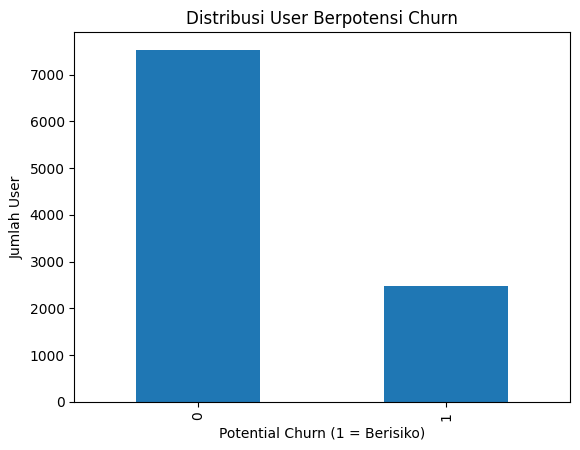

In [48]:
import matplotlib.pyplot as plt

plt.figure()
df['potential_churn'].value_counts().plot(kind='bar')
plt.title("Distribusi User Berpotensi Churn")
plt.xlabel("Potential Churn (1 = Berisiko)")
plt.ylabel("Jumlah User")
plt.show()
